#### 1. Combinamos los datasets de las asignaturas para obtener mas de 500 registros

In [ ]:
import pandas as pd


df_math = pd.read_csv("../train/Maths.csv")
df_port = pd.read_csv("../train/Portuguese.csv")


df_math["subject"] = "math"
df_port["subject"] = "portuguese"


df = pd.concat([df_math, df_port], ignore_index=True)


print("Total filas combinadas:", df.shape[0])
df.head()

Total filas combinadas: 1044


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


#### 2. Codificamos las variables categoricas


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
le = LabelEncoder()
df_model["sex"] = le.fit_transform(df_model["sex"])           
df_model["subject"] = le.fit_transform(df_model["subject"])   

#### 3. Seleccionar features y target 

In [4]:
features = ['Dalc', 'Walc', 'studytime', 'absences', 'failures',
            'goout', 'health', 'age', 'sex', 'subject']
target = 'G3'

X = df_model[features]
y = df_model[target]

#### 4. Dividir en entrenamiento y prueba

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (835, 10)
Prueba: (209, 10)


#### 5. Entrenamiento del modelo de regresion lineal

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 6. Prediccion

In [7]:
y_pred = model.predict(X_test)

#### 7. Evaluación

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 3.71
R²: 0.11


##### Visualizacion

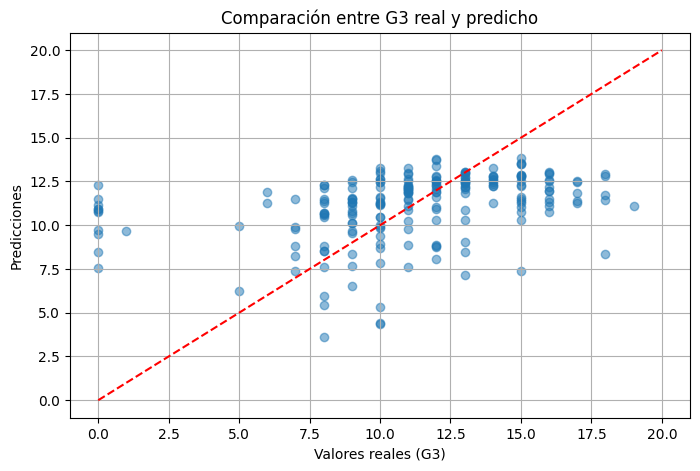

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 20], [0, 20], '--r')
plt.xlabel("Valores reales (G3)")
plt.ylabel("Predicciones")
plt.title("Comparación entre G3 real y predicho")
plt.grid(True)
plt.show()


#### Guardar el modelo entrenado

In [10]:
import joblib

joblib.dump(model, "../model.pkl")

print("Modelo guardado exitosamente como model.pkl")

Modelo guardado exitosamente como model.pkl
